# 统计学：决策的科学项目说明

说明：点此查看此文档的英文版本。

## 背景信息
在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

## 调查问题
作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

**1**. 我们的自变量是什么？因变量是什么？

自变量：文字与颜色匹配与否的文字条件

因变量：说出文字墨色名称所花费的时间


**2**. 此任务的适当假设集是什么？你想执行什么类型的统计测试？为你的选择提供正当理由。

μ1:**一致文字条件**下所花费的样本时间均值；μ2:**不一致文字条件**下所花费样本时间均值。

零假设 Ho:μ1=μ2,**一致文字条件**和**不一致文字条件**说出文字墨色名称所花费的时间**相同**。

对立假设 H1:μ1<μ2,**一致文字条件**比**不一致文字条件**说出文字墨色名称所花费的时间**短**。

使用T检验，是因为不知道总体的标准差，而且样本也符合正态分布；

使用**相依样本**检验，因为是在同一个人的两种不同条件下的样本，对同一个人的两种情况下所花的时间的差值做统计分析；

选择**单尾检验**，以及统计显著性水平alpha0.05，因为**不一致文字条件**需要做额外的思考，很可能比**一致文字条件**所花的时间长，根据这个趋势所以选择了单尾检验。


前提要求: 总体的分布应该是正态分布的；另外，参与者能够正常的识别颜色，而且如实的参与测试。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。



In [18]:
%matplotlib inline
# 导入所有需要的函数
import csv
from datetime import datetime
import numpy as np
import pandas as pd
# visualizations module from babs :)
from visualizations import show_max_min, usage_plot 
from IPython.display import display

In [19]:
sample_data = pd.read_csv('stroopdata.csv')
display(sample_data.head())

,Congruent,Incongruent,Incongruent-Congruent
0,8.630,15.687,7.057
1,8.987,17.394,8.407
2,9.401,20.762,11.361
3,9.564,21.214,11.650
4,10.639,20.429,9.790


In [20]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
Congruent                24 non-null float64
Incongruent              24 non-null float64
Incongruent-Congruent    24 non-null float64
dtypes: float64(3)
memory usage: 648.0 bytes


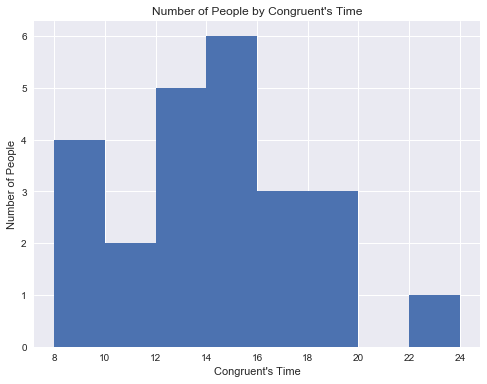

In [21]:
usage_plot(sample_data, 'Congruent', boundary = 8, bin_width = 2)

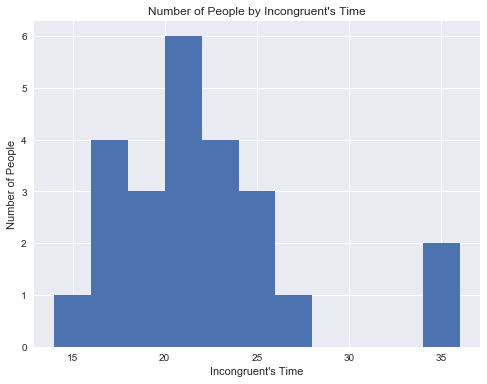

In [22]:
usage_plot(sample_data, 'Incongruent', boundary = 10, bin_width = 2)

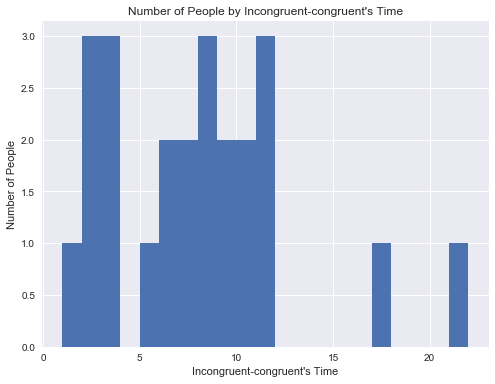

In [23]:
# D = Incongruent - Congruent
usage_plot(sample_data, 'Incongruent-Congruent', boundary = 1, bin_width = 1)

In [24]:
show_max_min(sample_data, 'Congruent')
show_max_min(sample_data, 'Incongruent')
show_max_min(sample_data, 'Incongruent-Congruent')

data:Congruent max:22.328, min:8.63
data:Incongruent max:35.255, min:15.687
data:Incongruent-Congruent max:21.919, min:1.95


**3**.	报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

**答**：说出文字墨色名称所花费的时间，Congruent条件下人数最多的是14~16s分组，而Incongruent条件下人数最多的是20~22s；说出文字墨色名称所花费的时间，Congruent条件下是：max:22.328, min:8.63，极差=max-min=13.7；而Incongruent条件下是：max:35.255, min:15.687, 极差=max-min=19.57。

**4**. 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

**答**: 对比两个Congruent和Incongruent条件下的分布图，大部分人在Incongruent条件花的时间较长，而Congruent条件下花的时间较短。通过观察D数据的频率直方图，可知该分布类似正态分布，而且大部分的数据并不是在0附近，也可说明在Incongruent条件花的时间较长。

**5**. 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

**答**：执行单尾检测，设显著性水平alpha = 0.05，则置信水平为0.95, 在df=23时，t0临界值=1.714

Congruent: 均值为X1=14.05，方差为Sd1=3.56

Incongruent: 均值为X2=22.02，方差为Sd2=4.80

Incongruent-Congruent: 均值为Xd=X2-X1=7.96，方差为SD=4.86, t=8.2>t0，查看t-table得知P-value << 0.0005

所以可以拒绝零假设，对立假设成立，不一致文字条件比一致文字条件说出文字墨色名称所花费的时间长。

**6**. 可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！

**答**: 在“一致文字条件”下，颜色和含义的识别没有冲突，甚至可以在颜色不做过多的思考，只需要识别文字即可。在“不一致文字条件”下，颜色和含义的识别是有冲突的，大脑需要化更多的时间识别这样的冲突后找出正确答案。

类似任务：参与者从纸条上读出两种条件下的句子，条件分别是字词倒立和非倒立，然后记录所花费的时间。